# LAB 4

Problem Satement

Develop a machine learning model for predicting the risk of diabetes progression. Leveraging the Body Mass Index (BMI) as the key feature, the model aims to provide healthcare professionals with a tool for early identification of individuals at higher risk. 

In [133]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


In [134]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Convert the data to a DataFrame for easier analysis
diabetes_df = pd.DataFrame(data=diabetes_X, columns=datasets.load_diabetes()['feature_names'])
diabetes_df['Progression'] = diabetes_y

print(diabetes_df)

          age       sex       bmi        bp        s1        s2        s3   
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Progression  
0   -0.002592  0.019907 -0

### EDA

In [135]:
# Display statistics
statistics = diabetes_df.describe()
print(statistics)

                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

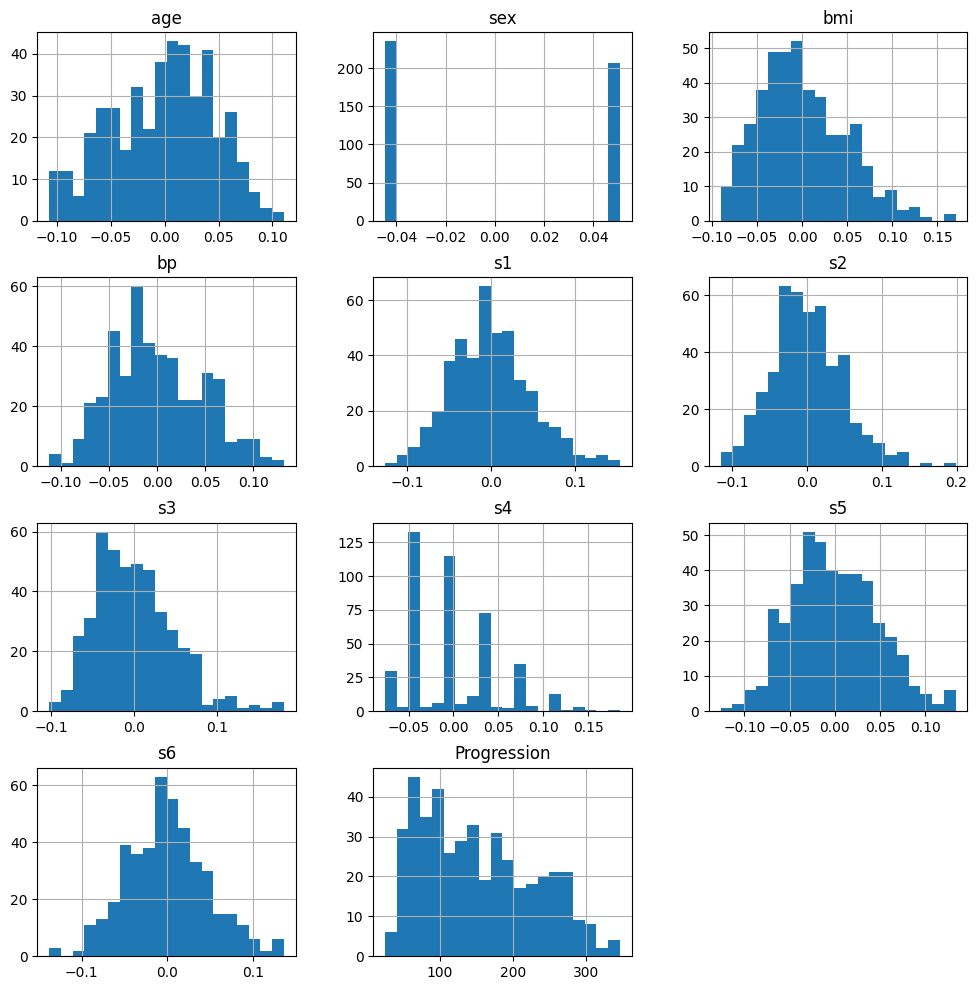

In [136]:
# Plot histograms
diabetes_df.hist(bins=20, figsize=(12, 12))
plt.show()

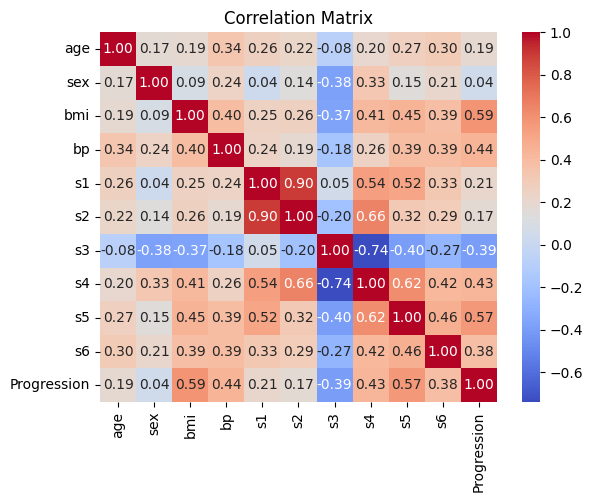

In [137]:
# Correlation matrix
correlation_matrix = diabetes_df.corr()
4
# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Clean the Data

In [138]:
# Check for missing values
missing_values = diabetes_df.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


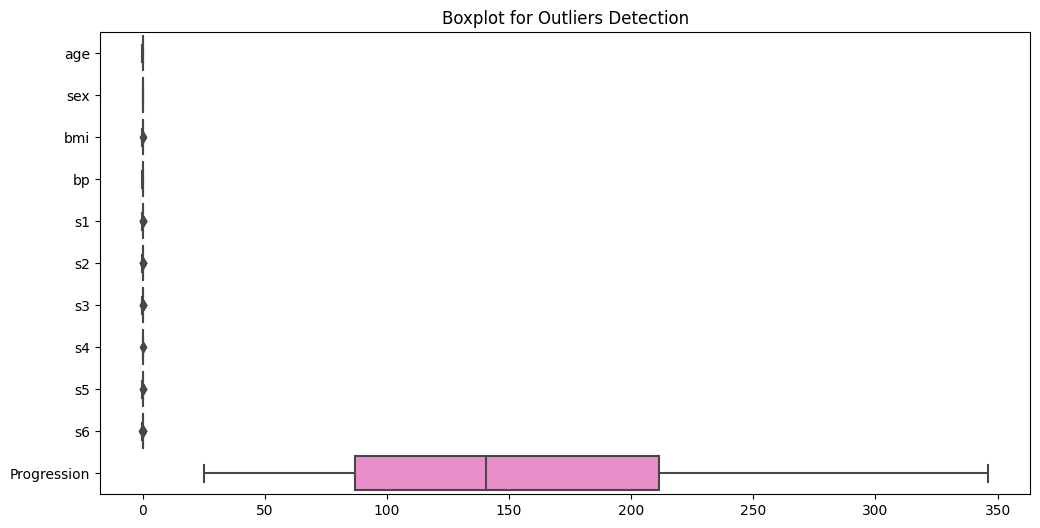

In [139]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_df, orient='h')
plt.title('Boxplot for Outliers Detection')
plt.show()

In [140]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

In [141]:
Q1 = diabetes_df['bmi'].quantile(0.25)
Q3 = diabetes_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (diabetes_df['bmi'] < (Q1 - 1.5 * IQR)) | (diabetes_df['bmi'] > (Q3 + 1.5 * IQR))
diabetes_df = diabetes_df[~outlier_mask]

In [142]:
# Example: Remove outliers using IQR method
Q1 = diabetes_df['bmi'].quantile(0.25)
Q3 = diabetes_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (diabetes_df['bmi'] < (Q1 - 1.5 * IQR)) | (diabetes_df['bmi'] > (Q3 + 1.5 * IQR))

# Print the number of outliers removed
num_outliers_removed = sum(outlier_mask)
print(f"Number of outliers removed: {num_outliers_removed}")

# Remove outliers from the DataFrame
diabetes_df = diabetes_df[~outlier_mask]


Number of outliers removed: 1


#### Split the Datset

In [143]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [144]:
import numpy as np

# Ensure X_train is 2D (if it's not already)
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Rest of your code
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # ...


In [145]:
print("Before reshaping:")
print(X_train.shape)

X_train_reshaped = X_train.reshape(-1, 1)
print("After reshaping:")
print(X_train_reshaped.shape)


Before reshaping:
(309, 10)
After reshaping:
(3090, 1)


In [146]:
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_poly: (309, 3003)
Shape of y_train: (309,)


In [147]:
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of y_train_reshaped:", y_train_reshaped.shape)


Shape of X_train_poly: (309, 3003)
Shape of y_train_reshaped: (309, 1)


In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

results = []

for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_val_poly = poly.transform(X_val.reshape(-1, 1))

    model = LinearRegression()

    # Ensure the number of samples matches
    y_train_reshaped = y_train.reshape(-1, 1)
    y_val_reshaped = y_val.reshape(-1, 1)

    try:
        model.fit(X_train_poly, y_train_reshaped)
    except ValueError as e:
        print(f"Error at degree {degree}: {e}")
        continue

    # Rest of your code
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    r2_train = r2_score(y_train_reshaped, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train_reshaped, y_train_pred)
    mae_train = mean_absolute_error(y_train_reshaped, y_train_pred)

    results.append((degree, r2_train, mape_train, mae_train))


Error at degree 0: Found input variables with inconsistent numbers of samples: [3090, 309]
Error at degree 1: Found input variables with inconsistent numbers of samples: [3090, 309]
Error at degree 2: Found input variables with inconsistent numbers of samples: [3090, 309]
Error at degree 3: Found input variables with inconsistent numbers of samples: [3090, 309]
Error at degree 4: Found input variables with inconsistent numbers of samples: [3090, 309]
Error at degree 5: Found input variables with inconsistent numbers of samples: [3090, 309]


In [149]:
# Print shapes before entering the loop
print("Before Loop - Shape of X_train:", X_train.shape)
print("Before Loop - Shape of y_train:", y_train.shape)
print("Before Loop - Shape of X_val:", X_val.shape)
print("Before Loop - Shape of y_val:", y_val.shape)

Before Loop - Shape of X_train: (309, 10)
Before Loop - Shape of y_train: (309,)
Before Loop - Shape of X_val: (66, 10)
Before Loop - Shape of y_val: (66,)


In [150]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

results = []

# Assuming X_train, y_train, X_val, and y_val are already defined

# Loop for polynomial regression
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()

    try:
        model.fit(X_train_poly, y_train)
    except ValueError as e:
        print(f"Error at degree {degree}: {e}")
        continue

    # Calculate predictions for training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Evaluate the model and store results
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_val = r2_score(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)

    results.append((degree, r2_train, mape_train, mae_train, r2_val, mape_val, mae_val))

# Print the results
for result in results:
    print(f"Degree {result[0]}: R2_train={result[1]}, MAPE_train={result[2]}, MAE_train={result[3]}, R2_val={result[4]}, MAPE_val={result[5]}, MAE_val={result[6]}")


Degree 0: R2_train=0.0, MAPE_train=0.637646882139282, MAE_train=66.71392214157791, R2_val=-0.008054937939272255, MAPE_val=0.5795774769765575, MAE_val=62.04295380994411
Degree 1: R2_train=0.5244124363545943, MAPE_train=0.39592493257864625, MAE_train=44.0978349926357, R2_val=0.5112619269090262, MAPE_val=0.34616337107122475, MAE_val=38.21668137234905
Degree 2: R2_train=0.6081125571650718, MAPE_train=0.34999955927409926, MAE_train=39.42527558973846, R2_val=0.36717480117274803, MAPE_val=0.3808962481749614, MAE_val=42.47137889141129
Degree 3: R2_train=0.8611899407938516, MAPE_train=0.20080337956691208, MAE_train=21.954692556634303, R2_val=-98.51807861293929, MAPE_val=2.629438225297879, MAE_val=320.57575757575756
Degree 4: R2_train=1.0, MAPE_train=1.0127720075386283e-13, MAE_train=1.1584284053407128e-11, R2_val=-46.58146009299327, MAPE_val=2.4334219315514867, MAE_val=302.91617550091104
Degree 5: R2_train=1.0, MAPE_train=1.3428171039114517e-13, MAE_train=1.5352138115242306e-11, R2_val=-43.6946

Model Comparison

Degree 1 has the highest R2 on the validation set (0.5113), indicating a better fit compared to other degrees.
Degree 1 also has the lowest MAE on the validation set (38.2167), suggesting better accuracy in predicting diabetes progression.
Considering both R2 and MAE, Degree 1 appears to be the best model among the six. It strikes a good balance between model complexity and performance.

In [152]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming the best model is Degree 1
chosen_degree = 1

# Fit PolynomialFeatures on the training set
poly = PolynomialFeatures(degree=chosen_degree)
X_train_poly = poly.fit_transform(X_train)

# Transform the validation and test sets using the fitted PolynomialFeatures
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Fit the model on the entire training set (including validation set)
chosen_model = LinearRegression()
chosen_model.fit(np.concatenate([X_train_poly, X_val_poly], axis=0), np.concatenate([y_train, y_val]))

# Evaluate on the test set
y_test_pred = chosen_model.predict(X_test_poly)

# Report metrics
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Chosen Model (Degree {chosen_degree}) on Test Set: R2={r2_test}, MSE={mse_test}, MAE={mae_test}")


Chosen Model (Degree 1) on Test Set: R2=0.4561943500809288, MSE=3087.7168506253392, MAE=45.344712133889644


#### Plot the Graph

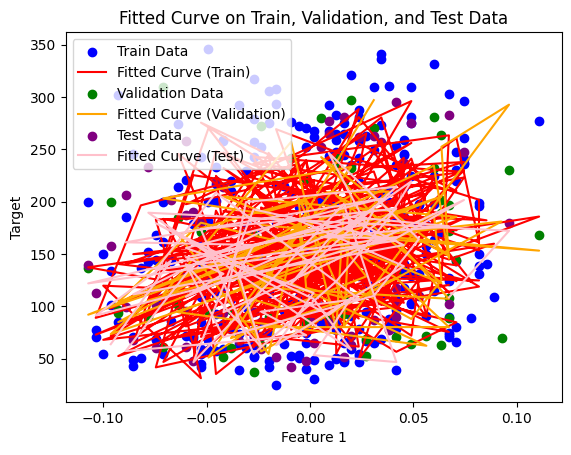

In [153]:
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are the respective datasets
# Create PolynomialFeatures and linear regression model as per previous code

# Fit the PolynomialFeatures on the training data
poly.fit(X_train)

# Transform the datasets using the fitted PolynomialFeatures
X_train_poly = poly.transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model on the transformed training data
chosen_model.fit(X_train_poly, y_train)

# Predict on the transformed datasets
y_train_pred = chosen_model.predict(X_train_poly)
y_val_pred = chosen_model.predict(X_val_poly)
y_test_pred = chosen_model.predict(X_test_poly)

# Plot the data and the fitted curve for the training set
plt.scatter(X_train[:, 0], y_train, label='Train Data', color='blue')
plt.plot(X_train[:, 0], y_train_pred, label='Fitted Curve (Train)', color='red')

# Plot the data and the fitted curve for the validation set
plt.scatter(X_val[:, 0], y_val, label='Validation Data', color='green')
plt.plot(X_val[:, 0], y_val_pred, label='Fitted Curve (Validation)', color='orange')

# Plot the data and the fitted curve for the test set
plt.scatter(X_test[:, 0], y_test, label='Test Data', color='purple')
plt.plot(X_test[:, 0], y_test_pred, label='Fitted Curve (Test)', color='pink')

plt.title('Fitted Curve on Train, Validation, and Test Data')
plt.xlabel('Feature 1')  # Replace with the appropriate feature name
plt.ylabel('Target')
plt.legend()
plt.show()


In [154]:
feature_names = poly.get_feature_names_out()
num_trainable_parameters = len(feature_names)

print("Number of trainable parameters:", num_trainable_parameters)
print("Feature names:", feature_names)


Number of trainable parameters: 11
Feature names: ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9']
